# ¿Qué plan genera más ingresos para Megaline?

La finalidad del proyecto es determinar cuál de las dos tarifas que Megaline ofrece a sus clientes, Surf o Ultimate, genera más ingresos a la empresa para ajustar el presupuesto de publicidad. 

Se realizó una limpieza y corrección de los datos. Se estudió los parámetros principales analizando qué plan les conviene adquirir a los clientes. Se analizaron los pagos totales de los clientes usando histogramas. Posteriormente, se comparó las medias de las poblaciones para determinar la igualdad entre ellas.

## Información general

### Inicialización

In [795]:
import pandas as pd # importando pandas
from scipy import stats as st
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt


### Tabla Calls

La tabla 'calls' muestra los datos sobre las llamadas. Contiene cuatro columnas:

- 'id' — identificador único de la llamada 
- 'user_id' — identificador del usuario que realiza la llamada
- 'call_date' — fecha de la llamada
- 'duration' — duración de la llamada en minutos

Podemos ver que el tipo de dato de la columna 'call_date' debe ser cambiado a tipo fecha. Además, se han encontrado valores con duración de 0.00 minutos. En la tabla no se encontraron valores ausentes.

In [796]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [797]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [798]:
calls.head(5)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Tabla Internet

La tabla muestra los datos sobre las sesiones web. Contiene cuatro columnas:

- 'id' — identificador único de la sesión
- 'user_id' — identificador del usuario
- 'session_date' — fecha de la sesión web
- 'mb_used' — volumen de datos gastados durante la sesión en megabytes



In [799]:
internet = pd.read_csv('/datasets/megaline_internet.csv')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [800]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [801]:
internet.head(5)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Podemos ver que el tipo de dato de la columna 'session_date' debe ser cambiado a tipo fecha. En la tabla no se encontraron valores ausentes.

### Tabla Messages

La tabla muestra los datos sobre los SMS. Contiene tres columnas:

- 'id' — identificador único de SMS
- 'user_id' — identificador del usuario que envía SMS
- 'message_date' — fecha del SMS



In [802]:
messages = pd.read_csv('/datasets/megaline_messages.csv')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [803]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [804]:
messages.head(5)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Podemos ver que el tipo de dato de la columna 'message_date' debe ser cambiado a tipo fecha. En la tabla no se encontraron valores ausentes.

### Tabla Plans 

La tabla muestra los datos sobre las tarifas. Contiene ocho columnas para dos planes de tarifas:

- 'plan_name' — nombre de la tarifa
- 'usd_monthly_fee' — pago mensual en dólares estadounidenses
- 'minutes_included' — minutos incluidos al mes
- 'messages_included' — SMS incluidos al mes
- 'mb_per_month_included' — datos incluidos al mes (en megabytes)
- 'usd_per_minute' — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
- 'usd_per_message' — precio por SMS tras exceder los límites del paquete
- 'usd_per_gb' — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)

In [805]:
plans = pd.read_csv('/datasets/megaline_plans.csv')
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [806]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Tabla Users

La tabla muestra los datos sobre los usuarios. Contiene ocho columnas:

- 'user_id' — identificador único del usuario
- 'first_name' — nombre del usuario
- 'last_name' — apellido del usuario
- 'age' — edad del usuario (en años)
- 'reg_date' — fecha de suscripción (dd, mm, aa)
- 'churn_date' — la fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)
- 'city' — ciudad de residencia del usuario
- 'plan' — nombre de la tarifa



In [807]:
users = pd.read_csv('/datasets/megaline_users.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [808]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [809]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Podemos ver que el tipo de dato de las columnas 'reg_date' y 'churn_date' deben ser cambiado a tipo fecha.

### Conclusiones y siguientes pasos

- Se filtrarán solo las columnas necesarias y se realizarán las transformaciones a los tipos de datos adecuados para el análisis.
- Es necesario juntar las tablas con columnas específicas para obtener una mejor visión del comportamiento de los usuarios.


## Preprocesamiento de datos

Buscando y eliminando duplicados en todas las tablas:

In [810]:
calls.duplicated().sum()

0

In [811]:
internet.duplicated().sum()

0

In [812]:
messages.duplicated().sum()

0

In [813]:
plans.duplicated().sum()

0

In [814]:
users.duplicated().sum()

0

### Preprocesamiento de fecha

Transformamos los datos de fecha a su tipo correspondiente.

In [815]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")

In [816]:
users['reg_date'].min(), users['reg_date'].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

### Preprocesamieneo de Calls

In [817]:
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [818]:
#convirtiendo fecha en mes
calls['month']=calls['call_date'].dt.month

Buscando errores en los datos:

In [819]:
#Llamadas con 0 segundos de duración
(calls['duration']==0.00).sum()/len(calls['duration'])

0.1948233927469416

Las llamadas con 0 segundos de duración representan cerca del 20 % del total de llamadas realizadas; sin embargo, debido a que no genera ingresos se puede prescindir de estos datos. 

Convirtiendo los datos de segundos a minutos redondeando hacia arriba puesto que un segundo será contado por la empresa como un minuto.

In [820]:
calls['duration']=np.ceil(calls['duration']).astype(int)
calls['duration']

0          9
1         14
2         15
3          6
4          5
          ..
137730     9
137731    11
137732     9
137733     1
137734    14
Name: duration, Length: 137735, dtype: int64

In [821]:
tabla_calls=calls.groupby(['user_id','month'])[['duration']].sum().reset_index()
tabla_calls

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


### Preprocesamiento de Internet

In [822]:
internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [823]:
internet['month']=internet['session_date'].dt.month

In [824]:
#Creando tabla con duración total de Mb por usuario
tabla_internet=pd.pivot_table(internet,values='mb_used',index=['user_id','month'],aggfunc='sum').reset_index()
tabla_internet

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Convirtiendo los datos de megabytes a gigabytes:

In [825]:
#convirtiendo los mg a gb
tabla_internet['gb_used']=np.ceil(tabla_internet['mb_used']/1024)
tabla_internet.drop(['mb_used'],axis=1,inplace=True)
tabla_internet

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


In [826]:
tabla_internet['gb_used'].unique()

array([ 2.,  7., 14., 22., 19., 15., 27., 21., 24., 28., 17.,  3., 32.,
       37., 29., 20., 30., 23., 25., 11., 16., 13.,  8., 12., 18.,  4.,
        9.,  6.,  5., 10., 36., 33., 38., 40., 26., 46., 42.,  1., 44.,
       31., 35., 34., 66., 49., 41., 39., 51., 70.])

### Preprocesamiento de Messages

In [827]:
messages['month']=messages['message_date'].dt.month
messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


In [828]:
#Creando tabla con mensajes totales enviados por usuario
tabla_messages=pd.pivot_table(messages,values='id',index=['user_id','month'],aggfunc='count').reset_index()
tabla_messages=tabla_messages.rename({'id': 'SMS'}, axis=1)
tabla_messages

,user_id,month,SMS
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


### Tabla de ingresos

Para cada usuario, buscamos los ingresos mensuales en cuanto a llamadas, SMS y datos, además del cargo mensual por plan.

In [829]:
#juntando todas las tablas de la duración de llamadas, SMS enviados y datos usados en una sola tabla
tabla=tabla_calls.merge(tabla_internet,how='outer',on=['user_id','month'])
tabla=tabla.merge(tabla_messages, how='outer',on=['user_id','month'])

#rellenando datos vacíos
tabla=tabla.fillna(0)
tabla.info()
tabla

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   int64  
 1   month     2293 non-null   int64  
 2   duration  2293 non-null   float64
 3   gb_used   2293 non-null   float64
 4   SMS       2293 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 107.5 KB


,user_id,month,duration,gb_used,SMS
0,1000,12,124.0,2.0,11.0
1,1001,8,182.0,7.0,30.0
2,1001,9,315.0,14.0,44.0
3,1001,10,393.0,22.0,53.0
4,1001,11,426.0,19.0,36.0
...,...,...,...,...,...
2288,1349,10,0.0,13.0,76.0
2289,1349,11,0.0,17.0,72.0
2290,1349,12,0.0,13.0,61.0
2291,1361,5,0.0,2.0,2.0


Calculamos los datos necesarios para obtener los ingresos por usuario creando una tabla 'ingresos' en donde incluímos los costos por minuto de llamada, SMS y datos usados así como lo usado por cada cliente. La tabla con la información de ingresos por usuarios será llamada 'total_ingresos'. De esta última tabla, extraeremos la columna 'total' y la añadimos a la tabla 'tabla' que es la que será analizada. 

In [830]:
ingresos=tabla.merge(users[['user_id','plan']], how='left',on='user_id').rename({'plan': 'plan_name'}, axis=1)
ingresos=ingresos.merge(plans, how='right',on='plan_name')
ingresos

,user_id,month,duration,gb_used,SMS,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1001,8,182.0,7.0,30.0,surf,50,15360,500,20,10,0.03,0.03
1,1001,9,315.0,14.0,44.0,surf,50,15360,500,20,10,0.03,0.03
2,1001,10,393.0,22.0,53.0,surf,50,15360,500,20,10,0.03,0.03
3,1001,11,426.0,19.0,36.0,surf,50,15360,500,20,10,0.03,0.03
4,1001,12,412.0,19.0,44.0,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,11,0.0,21.0,42.0,ultimate,1000,30720,3000,70,7,0.01,0.01
2289,1204,12,0.0,36.0,78.0,ultimate,1000,30720,3000,70,7,0.01,0.01
2290,1224,6,0.0,3.0,5.0,ultimate,1000,30720,3000,70,7,0.01,0.01
2291,1311,6,0.0,2.0,0.0,ultimate,1000,30720,3000,70,7,0.01,0.01


In [831]:
#transformando los mb en gb del plan incluídos
ingresos.loc[ingresos['mb_per_month_included']==15360,'mb_per_month_included']=15
ingresos.loc[ingresos['mb_per_month_included']==30720,'mb_per_month_included']=30
ingresos.rename(columns={'mb_per_month_included':'gb_per_month_included'},inplace=True)
ingresos

,user_id,month,duration,gb_used,SMS,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1001,8,182.0,7.0,30.0,surf,50,15,500,20,10,0.03,0.03
1,1001,9,315.0,14.0,44.0,surf,50,15,500,20,10,0.03,0.03
2,1001,10,393.0,22.0,53.0,surf,50,15,500,20,10,0.03,0.03
3,1001,11,426.0,19.0,36.0,surf,50,15,500,20,10,0.03,0.03
4,1001,12,412.0,19.0,44.0,surf,50,15,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,11,0.0,21.0,42.0,ultimate,1000,30,3000,70,7,0.01,0.01
2289,1204,12,0.0,36.0,78.0,ultimate,1000,30,3000,70,7,0.01,0.01
2290,1224,6,0.0,3.0,5.0,ultimate,1000,30,3000,70,7,0.01,0.01
2291,1311,6,0.0,2.0,0.0,ultimate,1000,30,3000,70,7,0.01,0.01


In [832]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   duration               2293 non-null   float64
 3   gb_used                2293 non-null   float64
 4   SMS                    2293 non-null   float64
 5   plan_name              2293 non-null   object 
 6   messages_included      2293 non-null   int64  
 7   gb_per_month_included  2293 non-null   int64  
 8   minutes_included       2293 non-null   int64  
 9   usd_monthly_pay        2293 non-null   int64  
 10  usd_per_gb             2293 non-null   int64  
 11  usd_per_message        2293 non-null   float64
 12  usd_per_minute         2293 non-null   float64
dtypes: float64(5), int64(7), object(1)
memory usage: 250.8+ KB


Se observa que hay usuarios que no han realizado llamadas ni sms ni usado internet.

In [833]:
#rellenamos los datos nulos
ingresos[['duration','gb_used','SMS']]=ingresos[['duration','gb_used','SMS']].fillna(0)
ingresos

,user_id,month,duration,gb_used,SMS,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1001,8,182.0,7.0,30.0,surf,50,15,500,20,10,0.03,0.03
1,1001,9,315.0,14.0,44.0,surf,50,15,500,20,10,0.03,0.03
2,1001,10,393.0,22.0,53.0,surf,50,15,500,20,10,0.03,0.03
3,1001,11,426.0,19.0,36.0,surf,50,15,500,20,10,0.03,0.03
4,1001,12,412.0,19.0,44.0,surf,50,15,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,11,0.0,21.0,42.0,ultimate,1000,30,3000,70,7,0.01,0.01
2289,1204,12,0.0,36.0,78.0,ultimate,1000,30,3000,70,7,0.01,0.01
2290,1224,6,0.0,3.0,5.0,ultimate,1000,30,3000,70,7,0.01,0.01
2291,1311,6,0.0,2.0,0.0,ultimate,1000,30,3000,70,7,0.01,0.01


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Si no necesitas todas columnas para analisis entocnes puedes eliminar unas

Calculando los ingresos por llamadas extra.

In [834]:
total_ingresos=ingresos[['user_id','month','usd_monthly_pay']]

#calculando ingresos por llamadas extra
total_ingresos=total_ingresos.assign(usd_per_minute_extra=(ingresos['duration']-ingresos['minutes_included'])*ingresos['usd_per_minute'])
total_ingresos.loc[total_ingresos['usd_per_minute_extra']<0,'usd_per_minute_extra']=0
total_ingresos.info()
total_ingresos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2293 non-null   int64  
 1   month                 2293 non-null   int64  
 2   usd_monthly_pay       2293 non-null   int64  
 3   usd_per_minute_extra  2293 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 89.6 KB


,user_id,month,usd_monthly_pay,usd_per_minute_extra
0,1001,8,20,0.0
1,1001,9,20,0.0
2,1001,10,20,0.0
3,1001,11,20,0.0
4,1001,12,20,0.0
...,...,...,...,...
2288,1204,11,70,0.0
2289,1204,12,70,0.0
2290,1224,6,70,0.0
2291,1311,6,70,0.0


Calculando los ingresos por SMS extra.

In [835]:
total_ingresos['usd_per_sms_extra']=(ingresos['SMS']-ingresos['messages_included'])*ingresos['usd_per_message']
total_ingresos.loc[total_ingresos['usd_per_sms_extra']<0,'usd_per_sms_extra']=0
total_ingresos.info()
total_ingresos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2293 non-null   int64  
 1   month                 2293 non-null   int64  
 2   usd_monthly_pay       2293 non-null   int64  
 3   usd_per_minute_extra  2293 non-null   float64
 4   usd_per_sms_extra     2293 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 107.5 KB


,user_id,month,usd_monthly_pay,usd_per_minute_extra,usd_per_sms_extra
0,1001,8,20,0.0,0.00
1,1001,9,20,0.0,0.00
2,1001,10,20,0.0,0.09
3,1001,11,20,0.0,0.00
4,1001,12,20,0.0,0.00
...,...,...,...,...,...
2288,1204,11,70,0.0,0.00
2289,1204,12,70,0.0,0.00
2290,1224,6,70,0.0,0.00
2291,1311,6,70,0.0,0.00


Calculando los ingresos por gb extra.

In [836]:
total_ingresos['usd_per_gb_extra']=(ingresos['gb_used']-ingresos['gb_per_month_included'])*ingresos['usd_per_gb']
total_ingresos.loc[total_ingresos['usd_per_gb_extra']<0,'usd_per_gb_extra']=0
total_ingresos.info()
total_ingresos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               2293 non-null   int64  
 1   month                 2293 non-null   int64  
 2   usd_monthly_pay       2293 non-null   int64  
 3   usd_per_minute_extra  2293 non-null   float64
 4   usd_per_sms_extra     2293 non-null   float64
 5   usd_per_gb_extra      2293 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 125.4 KB


,user_id,month,usd_monthly_pay,usd_per_minute_extra,usd_per_sms_extra,usd_per_gb_extra
0,1001,8,20,0.0,0.00,0.0
1,1001,9,20,0.0,0.00,0.0
2,1001,10,20,0.0,0.09,70.0
3,1001,11,20,0.0,0.00,40.0
4,1001,12,20,0.0,0.00,40.0
...,...,...,...,...,...,...
2288,1204,11,70,0.0,0.00,0.0
2289,1204,12,70,0.0,0.00,42.0
2290,1224,6,70,0.0,0.00,0.0
2291,1311,6,70,0.0,0.00,0.0


Calculamos el ingreso total por usuario.

In [837]:
total_ingresos['total']=total_ingresos['usd_monthly_pay']+total_ingresos['usd_per_minute_extra']+total_ingresos['usd_per_sms_extra']+total_ingresos['usd_per_gb_extra']
total_ingresos

,user_id,month,usd_monthly_pay,usd_per_minute_extra,usd_per_sms_extra,usd_per_gb_extra,total
0,1001,8,20,0.0,0.00,0.0,20.00
1,1001,9,20,0.0,0.00,0.0,20.00
2,1001,10,20,0.0,0.09,70.0,90.09
3,1001,11,20,0.0,0.00,40.0,60.00
4,1001,12,20,0.0,0.00,40.0,60.00
...,...,...,...,...,...,...,...
2288,1204,11,70,0.0,0.00,0.0,70.00
2289,1204,12,70,0.0,0.00,42.0,112.00
2290,1224,6,70,0.0,0.00,0.0,70.00
2291,1311,6,70,0.0,0.00,0.0,70.00


In [838]:
 total_ingresos.describe()

,user_id,month,usd_monthly_pay,usd_per_minute_extra,usd_per_sms_extra,usd_per_gb_extra,total
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,35.699956,1.264828,0.144322,27.242041,64.351147
std,143.051927,2.496386,23.210863,3.233992,0.493515,48.571724,46.624945
min,1000.000000,1.000000,20.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,20.000000,0.000000,0.000000,0.000000,23.480000
50%,1245.000000,10.000000,20.000000,0.000000,0.000000,0.000000,70.000000
75%,1368.000000,11.000000,70.000000,0.000000,0.000000,40.000000,70.000000
max,1499.000000,12.000000,70.000000,30.300000,6.480000,550.000000,590.370000


Añadiendo el tipo de plan y el total de ingresos por usuario a la tabla a analizar: 

In [839]:
tabla

,user_id,month,duration,gb_used,SMS
0,1000,12,124.0,2.0,11.0
1,1001,8,182.0,7.0,30.0
2,1001,9,315.0,14.0,44.0
3,1001,10,393.0,22.0,53.0
4,1001,11,426.0,19.0,36.0
...,...,...,...,...,...
2288,1349,10,0.0,13.0,76.0
2289,1349,11,0.0,17.0,72.0
2290,1349,12,0.0,13.0,61.0
2291,1361,5,0.0,2.0,2.0


In [840]:
tabla=tabla.merge(users[['user_id','plan','city']], how='left',on='user_id')
tabla=tabla.merge(total_ingresos[['user_id','month','usd_monthly_pay','total']], how='outer',on=['user_id','month'])
tabla[['duration','gb_used','SMS']]=tabla[['duration','gb_used','SMS']].fillna(0)
tabla

,user_id,month,duration,gb_used,SMS,plan,city,usd_monthly_pay,total
0,1000,12,124.0,2.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70,70.00
1,1001,8,182.0,7.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,20.00
2,1001,9,315.0,14.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,20.00
3,1001,10,393.0,22.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,90.09
4,1001,11,426.0,19.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,60.00
...,...,...,...,...,...,...,...,...,...
2288,1349,10,0.0,13.0,76.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",20,20.78
2289,1349,11,0.0,17.0,72.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",20,40.66
2290,1349,12,0.0,13.0,61.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",20,20.33
2291,1361,5,0.0,2.0,2.0,surf,"Birmingham-Hoover, AL MSA",20,20.00


In [841]:
tabla.loc[tabla['month'].isna(),'user_id'].count()

0

In [842]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          2293 non-null   int64  
 1   month            2293 non-null   int64  
 2   duration         2293 non-null   float64
 3   gb_used          2293 non-null   float64
 4   SMS              2293 non-null   float64
 5   plan             2293 non-null   object 
 6   city             2293 non-null   object 
 7   usd_monthly_pay  2293 non-null   int64  
 8   total            2293 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 179.1+ KB


Debido a que hubo clientes que cancelaron la línea, revisamos si fue por exceso de pago para verificar si requiere un análisis adicional.

In [843]:
usuarios_retirados=users.loc[~users['churn_date'].isna()]['user_id']
usuarios_retirados.count()

34

In [844]:
tabla.query('user_id in @usuarios_retirados')

,user_id,month,duration,gb_used,SMS,plan,city,usd_monthly_pay,total
19,1006,11,10.0,3.0,15.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",70,70.00
20,1006,12,59.0,32.0,139.0,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",70,84.00
53,1012,11,75.0,14.0,0.0,surf,"Chicago-Naperville-Elgin, IL-IN-WI MSA",20,20.00
54,1012,12,78.0,12.0,0.0,surf,"Chicago-Naperville-Elgin, IL-IN-WI MSA",20,20.00
75,1022,5,302.0,5.0,0.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",20,20.00
...,...,...,...,...,...,...,...,...,...
2213,1491,8,382.0,11.0,50.0,surf,"Grand Rapids-Kentwood, MI MSA",20,20.00
2214,1491,9,414.0,7.0,50.0,surf,"Grand Rapids-Kentwood, MI MSA",20,20.00
2215,1491,10,585.0,9.0,51.0,surf,"Grand Rapids-Kentwood, MI MSA",20,22.58
2216,1491,11,409.0,6.0,46.0,surf,"Grand Rapids-Kentwood, MI MSA",20,20.00


In [845]:
tabla.query('user_id in @usuarios_retirados')['total'].median()

70.0

No se requiere un análisis adicional para usuarios retirados.

### Conclusiones

- Las llamadas con 0 segundos de duración representan cerca del 20 % del total de llamadas realizadas; sin embargo, debido a que no genera ingresos se puede prescindir de estos datos.
- Los usuarios retirados tuvieron una mediana igual al valor del monto del plan, por lo que una razón del retiro no sería el pago excesivo. No se requiere análisis adicional para este caso.
- Hay 10 usuarios que no han realizado llamadas, ni enviado SMS, ni usado GB, por lo que se podría prescindir de ellos para el análisis de datos.

## Análisis de datos

Analizamos cuánto se gasta por mes más de lo que deberían gastar.

In [846]:
len(tabla.loc[tabla['total']>tabla['usd_monthly_pay']]['user_id'].unique())

313

De los 500 clientes, 313 gastaron más dinero de lo que deberían gastar en al menos un mes. 

Analizando los gastos excesivos por tipo de plan:

In [847]:
tabla.loc[tabla['plan']=='surf']['total'].mean()

60.706408137317226

In [848]:
tabla.loc[tabla['plan']=='surf']['total'].median()

40.36

Los usuarios de plan Surf pagan en promedio 40.7 dólares adicionales.

In [849]:
tabla.loc[tabla['plan']=='ultimate']['total'].mean()

72.31388888888888

In [850]:
tabla.loc[tabla['plan']=='ultimate']['total'].median()

70.0

Los usuarios del plan Ultimate pagan en promedio 2.3 dólares adicionales.

Encontramos los minutos, SMS y volumen de datos que requieren los usuarios de cada tarifa por mes. Debido a que los clientes del plan Ultimate no pueden cambiar a un plan superior, solo modificaremos a los clientes del plan Surf cuyos ingresos sean mayores que los del Plan Ultimate, puesto que de otra forma les convendría mantenerse en el plan Surf.

In [851]:
#Buscando cuántos usuarios del plan Surf deberían incrementar su tarifa al plan Ultimate.
tabla_surf=tabla[tabla['plan']=='surf']

#agregando columna 'usd_nuevo_duration' que muestra los dolares adicionales por pagar por llamada
tabla_surf=tabla_surf.assign(usd_nuevo_duration=(tabla_surf['duration']-3000)*0.01)
tabla_surf.loc[tabla_surf['usd_nuevo_duration']<0,'usd_nuevo_duration']=0
#agregando columna 'usd_nuevo_gb' que muestra los dolares adicionales por pagar por gb
tabla_surf.loc[tabla_surf['gb_used']>30,'usd_nuevo_gb']=(tabla_surf['gb_used']-30)*7
#agregando columna 'usd_nuevo_SMS' que muestra los dolares adicionales por pagar por SMS
tabla_surf.loc[tabla_surf['SMS']>1000,'usd_nuevo_SMS']=(tabla_surf['SMS']-1000)*1

#omitiendo NA
tabla_surf['usd_nuevo_duration']=tabla_surf['usd_nuevo_duration'].fillna(0)
tabla_surf['usd_nuevo_gb']=tabla_surf['usd_nuevo_gb'].fillna(0)
tabla_surf['usd_nuevo_SMS']=tabla_surf['usd_nuevo_SMS'].fillna(0)

#tabla_surf
tabla_surf['total_cambio_plan']=70 +tabla_surf['usd_nuevo_gb']+tabla_surf['usd_nuevo_duration']+tabla_surf['usd_nuevo_SMS']
tabla_surf.drop(['usd_nuevo_duration','usd_nuevo_gb','usd_nuevo_SMS'],axis=1,inplace=True)
tabla_surf.loc[tabla_surf['total']<tabla_surf['total_cambio_plan'],'total_cambio_plan']=tabla_surf['total']
tabla_surf

,user_id,month,duration,gb_used,SMS,plan,city,usd_monthly_pay,total,total_cambio_plan
1,1001,8,182.0,7.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,20.00,20.00
2,1001,9,315.0,14.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,20.00,20.00
3,1001,10,393.0,22.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,90.09,70.00
4,1001,11,426.0,19.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,60.00,60.00
5,1001,12,412.0,19.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,60.00,60.00
...,...,...,...,...,...,...,...,...,...,...
2283,1194,12,0.0,31.0,56.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",20,180.18,77.00
2288,1349,10,0.0,13.0,76.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",20,20.78,20.78
2289,1349,11,0.0,17.0,72.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",20,40.66,40.66
2290,1349,12,0.0,13.0,61.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",20,20.33,20.33


In [852]:
#ponemos la opción de cuánto pagarían si aumentaran de plan
tabla_surf.loc[tabla_surf['total']>tabla_surf['total_cambio_plan'], 'recomendacion'] ='Cambiar a plan Ultimate'
tabla_surf=tabla_surf.assign(ahorro=0)
tabla_surf.loc[tabla_surf['total']>tabla_surf['total_cambio_plan'], 'ahorro'] =tabla_surf['total']-tabla_surf['total_cambio_plan']


#cambiando nombre de plan de surf a ultimate a los usuarios que aumentaron de plan
tabla_surf.loc[tabla_surf['total']>tabla_surf['total_cambio_plan'], 'plan'] ='ultimate'
tabla_surf



,user_id,month,duration,gb_used,SMS,plan,city,usd_monthly_pay,total,total_cambio_plan,recomendacion,ahorro
1,1001,8,182.0,7.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,20.00,20.00,NaN,0.00
2,1001,9,315.0,14.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,20.00,20.00,NaN,0.00
3,1001,10,393.0,22.0,53.0,ultimate,"Seattle-Tacoma-Bellevue, WA MSA",20,90.09,70.00,Cambiar a plan Ultimate,20.09
4,1001,11,426.0,19.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,60.00,60.00,NaN,0.00
5,1001,12,412.0,19.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,60.00,60.00,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2283,1194,12,0.0,31.0,56.0,ultimate,"San Jose-Sunnyvale-Santa Clara, CA MSA",20,180.18,77.00,Cambiar a plan Ultimate,103.18
2288,1349,10,0.0,13.0,76.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",20,20.78,20.78,NaN,0.00
2289,1349,11,0.0,17.0,72.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",20,40.66,40.66,NaN,0.00
2290,1349,12,0.0,13.0,61.0,surf,"Boston-Cambridge-Newton, MA-NH MSA",20,20.33,20.33,NaN,0.00


In [853]:
#calculando a cuántos usuarios les resultó más económico subir de plan en al menos un mes
len(tabla_surf.loc[tabla_surf['plan']=='ultimate']['user_id'].unique())


187

In [854]:
#total de usuarios en plan surf
len(tabla_surf['user_id'].unique())

333

In [855]:
#calculando ahorro promedio
tabla_surf.loc[tabla_surf['ahorro']>0]['ahorro'].mean()

47.5714693877551

Se recomienda el cambio de plan de Surf a Ultimate a 234 clientes de 333, los cuales tendrán en promedio un ahorro de 53.09 dólares.

Analizaremos las medias, medianas, desviaciones estándar y varianzas de los datos que tenemos.

In [856]:
tabla.describe()

,user_id,month,duration,gb_used,SMS,usd_monthly_pay,total
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,429.283471,16.870475,33.166594,35.699956,64.351147
std,143.051927,2.496386,236.320077,7.796174,34.070085,23.210863,46.624945
min,1000.000000,1.000000,0.000000,0.000000,0.000000,20.000000,20.000000
25%,1122.000000,8.000000,265.000000,12.000000,3.000000,20.000000,23.480000
50%,1245.000000,10.000000,425.000000,17.000000,26.000000,20.000000,70.000000
75%,1368.000000,11.000000,572.000000,21.000000,51.000000,70.000000,70.000000
max,1499.000000,12.000000,1510.000000,70.000000,266.000000,70.000000,590.370000


In [857]:
np.var(tabla)

user_id            20454.929261
month                  6.229224
duration           55822.823264
gb_used               60.753830
SMS                 1160.264440
usd_monthly_pay      538.509189
total               2172.937475
dtype: float64

Comparamos la media, la varianza y la desviación estándar de las tarifas que usan los usuarios.

In [858]:
t_surf=tabla.loc[tabla['plan']=='surf']
t_ultimate=tabla.loc[tabla['plan']=='ultimate']

In [859]:
t_surf.mean(), np.var(t_surf)

(user_id            1242.755245
 month                 9.182454
 duration            428.749523
 gb_used              16.670693
 SMS                  31.159568
 usd_monthly_pay      20.000000
 total                60.706408
 dtype: float64,
 user_id            19372.095848
 month                  6.088135
 duration           54933.334591
 gb_used               61.544449
 SMS                 1126.008232
 usd_monthly_pay        0.000000
 total               3065.884844
 dtype: float64)

In [860]:
t_ultimate.mean(),np.var(t_ultimate)

(user_id            1253.330556
 month                 9.151389
 duration            430.450000
 gb_used              17.306944
 SMS                  37.551389
 usd_monthly_pay      70.000000
 total                72.313889
 dtype: float64,
 user_id            22743.899066
 month                  6.536804
 duration           57764.125278
 gb_used               58.748841
 SMS                 1207.077915
 usd_monthly_pay        0.000000
 total                129.668140
 dtype: float64)

A pesar del mayor costo del plan Ultimate con respecto al plan Surf, el pago promedio por cliente por mes es 3 veces el precio del valor mensual en el plan Surf. En cambio, en el plan ultimate el pago promedio es cerca de 2 dólares adicionales al precio del valor mensual.

### Histogramas del total de ingresos

(array([611.,  80.,  30.,  94.,  31., 100.,  16.,  79., 738.,  30.,  71.,
         27.,  62.,   8.,  45.,  38.,  20.,  41.,  17.,  16.,   3.,  17.,
         15.,   5.,  11.,  10.,   9.,   1.,   8.,   5.,   3.,   7.,   0.,
          7.,   2.,   5.,   3.,   4.,   4.,   4.,   1.,   0.,   1.,   1.,
          2.,   1.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 20.    ,  25.7037,  31.4074,  37.1111,  42.8148,  48.5185,
         54.2222,  59.9259,  65.6296,  71.3333,  77.037 ,  82.7407,
         88.4444,  94.1481,  99.8518, 105.5555, 111.2592, 116.9629,
        122.6666, 128.3703, 134.074 , 139.7777, 145.4814, 151.1851,
        156.8888, 162.5925, 168.2962, 173.9999

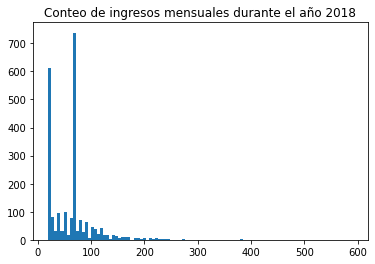

In [861]:
plt.title("Conteo de ingresos mensuales durante el año 2018")
plt.hist(x=tabla['total'],bins=100)

Las dos primeras columnas representa la cantidad de personas cuyos pagos totales no se excedieron del plan.

### Histograma del total de ingresos de usuarios del plan Surf que cambiaron y no cambiaron de plan

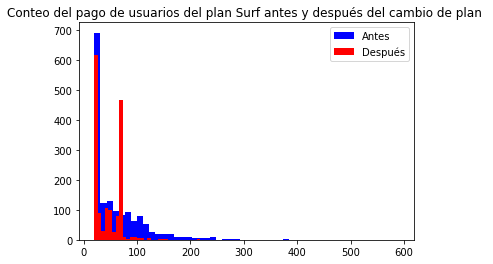

In [862]:
s1=tabla_surf['total'] 
s2=tabla_surf['total_cambio_plan'] 
plt.title("Conteo del pago de usuarios del plan Surf antes y después del cambio de plan ")
plt.hist(x=s1,bins=50,color='b', label = "Antes")
plt.hist(x=s2,bins=50,color='r', label = "Después")
plt.legend(loc = "upper right")

Se observa una considerable reducción en el pago de los clientes.

### Histograma por tipo de plan

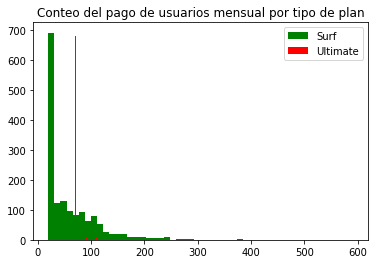

In [873]:
x1=tabla.loc[tabla['plan']=='surf']['total']
x2=tabla.loc[tabla['plan']=='ultimate']['total']
plt.title("Conteo del pago de usuarios mensual por tipo de plan")
plt.hist(x=x1,bins=50,color='g', label = "Surf")
plt.hist(x=x2,bins=50,color='r', label = "Ultimate")
plt.legend(loc = "upper right")

Los clientes que generan mayor gastos son los que tienen el plan Surf.

Graficaremos el mismo histograma pero con las mejoras de plan. 

In [864]:
nueva_tabla=tabla.loc[tabla['plan']=='ultimate'][['user_id','plan','total']]
#copiamos los datos de la columna 'total' a 'total_cambio_plan' para compararlo
nueva_tabla['total_cambio_plan']=nueva_tabla['total']

#juntamos la nueva tabla con los datos obtenidos de 'tabla_surf' con los cambios de planes realizados
nueva_tabla=nueva_tabla.merge(tabla_surf[['user_id','plan','total', 'total_cambio_plan']], how='outer',on=['user_id','plan','total', 'total_cambio_plan'])

nueva_tabla

,user_id,plan,total,total_cambio_plan
0,1000,ultimate,70.00,70.00
1,1006,ultimate,70.00,70.00
2,1006,ultimate,84.00,84.00
3,1008,ultimate,70.00,70.00
4,1008,ultimate,70.00,70.00
...,...,...,...,...
2288,1194,ultimate,290.36,154.00
2289,1194,ultimate,180.18,77.00
2290,1349,surf,20.78,20.78
2291,1349,surf,40.66,40.66


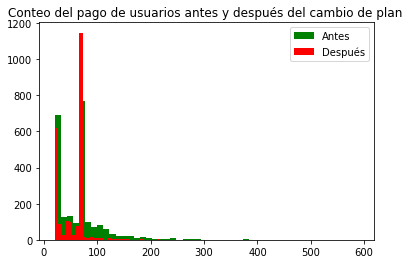

In [875]:
#graficando cambios totales de pagos
y1=nueva_tabla['total']
y2=nueva_tabla['total_cambio_plan']
plt.title("Conteo del pago de usuarios antes y después del cambio de plan ")
plt.hist(x=y1,bins=50,color='g', label = "Antes")
plt.hist(x=y2,bins=50,color='r', label = "Después")
plt.legend(loc = "upper right")

Graficamos el histograma de los nuevos ingresos con los cambios realizados.

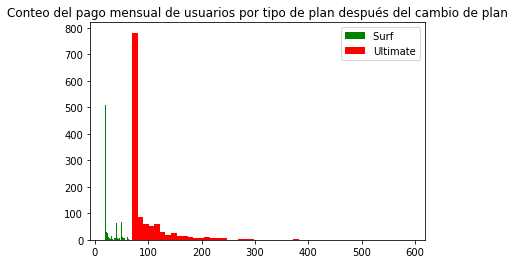

In [876]:
#graficando ultimate vs surf
z1=nueva_tabla.loc[nueva_tabla['plan']=='surf']['total']
z2=nueva_tabla.loc[nueva_tabla['plan']=='ultimate']['total']
plt.title("Conteo del pago mensual de usuarios por tipo de plan después del cambio de plan")
plt.hist(x=z1,bins=50,color='g', label = "Surf ")
plt.hist(x=z2,bins=50,color='r', label = "Ultimate")
plt.legend(loc = "upper right")

Se evidencia una diferencia a partir de 70 dolares, en donde es más conveniente para los usuarios tener el plan ultimate. Es muy poca la cantidad que se ha quedado en plan surf.

### Conclusiones

- De los 500 clientes, 313 gastan más dinero de lo que deberían gastar. Los usuarios de plan Surf pagan en promedio 40.7 dólares adicionales. Los usuarios del plan Ultimate pagan en promedio 2.3 dólares adicionales.
- Se recomienda el cambio de plan de Surf a Ultimate a 187 clientes de 333, los cuales tendrán en promedio un ahorro de 47.57 dólares.
- A pesar del mayor costo del plan Ultimate con respecto al plan Surf, el pago promedio por cliente por mes es 3 veces el precio del valor mensual en el plan Surf. En cambio, en el plan ultimate el pago promedio es muy cercano al precio del valor mensual.

## Prueba de hipótesis

Cómo formulaste las hipótesis nula y alternativa para las siguientes hipótesis:
Qué criterio utilizaste para probar las hipótesis y por qué.

### El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.

Debido a que queremos verificar si los ingresos promedios de las dos poblaciones independientes de las tarifas difieren, establecimos como hipótesis nula que 'las medias de las dos poblaciones son iguales', por lo que la hipótesis alternativa sería 'las medias de las dos poblaciones no son iguales'.

Establecemos el nivel crítico de significación estadística: alpha=0.05.

In [867]:
arraysurf=tabla.loc[tabla['plan']=='surf']['total']
arrayultimate=tabla.loc[tabla['plan']=='ultimate']['total']

In [868]:
alpha = 0.05

results =st.ttest_ind(arraysurf,arrayultimate,equal_var=False)
print('p-value:',results.pvalue)

if (results.pvalue<alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 3.17039054811355e-15
Rechazamos la hipótesis nula


El valor p nos dice que aunque las cantidades promedio para los dos planes son diferentes, existe una muy baja probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es claramente demasiado baja por lo que podemos concluir que las medias de las dos poblaciones no son iguales (hipótesis alternativa).

### El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

Queremos analizar si las medias de dos poblaciones independientes son diferentes, por lo que establecimos como hipótesis nula que 'la media de la población es igual a la media en el área 'Nueva York - Nueva Jersey''. Además, la hipótesis alternativa sería que 'la media de la población no es igual a la media en el área 'Nueva York - Nueva Jersey''.

Establecemos el nivel crítico de significación estadística: alpha=0.05.

In [869]:
alpha =0.05 

In [870]:
media_NY_NJ=tabla.loc[tabla['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total'].mean()
media_NY_NJ

59.921352785145885

In [878]:
#excluímos 'New York-Nueva Jersey' de la categoría 'city' y realizamos tabla de los promedios gastados por ciudad.
cities=pd.pivot_table(tabla.loc[tabla['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA'],values='total',index='city',aggfunc='mean')
cities

,total
city,
"Albany-Schenectady-Troy, NY MSA",148.220000
"Albuquerque, NM MSA",67.732143
"Atlanta-Sandy Springs-Roswell, GA MSA",75.178723
"Austin-Round Rock-Georgetown, TX MSA",56.633750
"Bakersfield, CA MSA",48.750000
...,...
"Tucson, AZ MSA",65.000000
"Tulsa, OK MSA",75.603333
"Urban Honolulu, HI MSA",112.932381


In [872]:
results = st.ttest_1samp(cities, media_NY_NJ)

print('p-value: ', results.pvalue)

if (results.pvalue<alpha):
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  [0.0254546]
Rechazamos la hipótesis nula


El valor p nos dice que aunque las cantidades promedio para los dos canales son diferentes, existe alrededor de un 2.5 % de probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es suficiente para concluir que las medias de la población en el área de New York - New Jersey no es igual a la media del resto de la población (hipótesis alternativa).

## Conclusiones generales

- Hay casi el doble de personas con plan surf que ultimate.
- Los clientes que generan mayor gastos son los que tienen el plan Surf.
- Se recomienda el cambio de plan de Surf a Ultimate a 187 clientes de 333, los cuales tendrán en promedio un ahorro de 47.57 dólares.
- Las medias de las poblaciones del plan Surf y Plan Ultimate no son iguales.
- La media de la población en el área de New York - New Jersey no es igual a la media del resto de la población.
